<a href="https://colab.research.google.com/github/garfield-gray/DCIM/blob/main/DCIMsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the name of God

Implementation of DCIM

Author: Abbas Mohamadiyan (Garfield Gray=)

this time easier=)

In [67]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from numpy.linalg import svd
from numpy.linalg import pinv
from scipy.linalg import hankel
from numpy.linalg import eig
from numpy.linalg import eigvals
from numpy.linalg import matrix_power
from numpy.linalg import lstsq

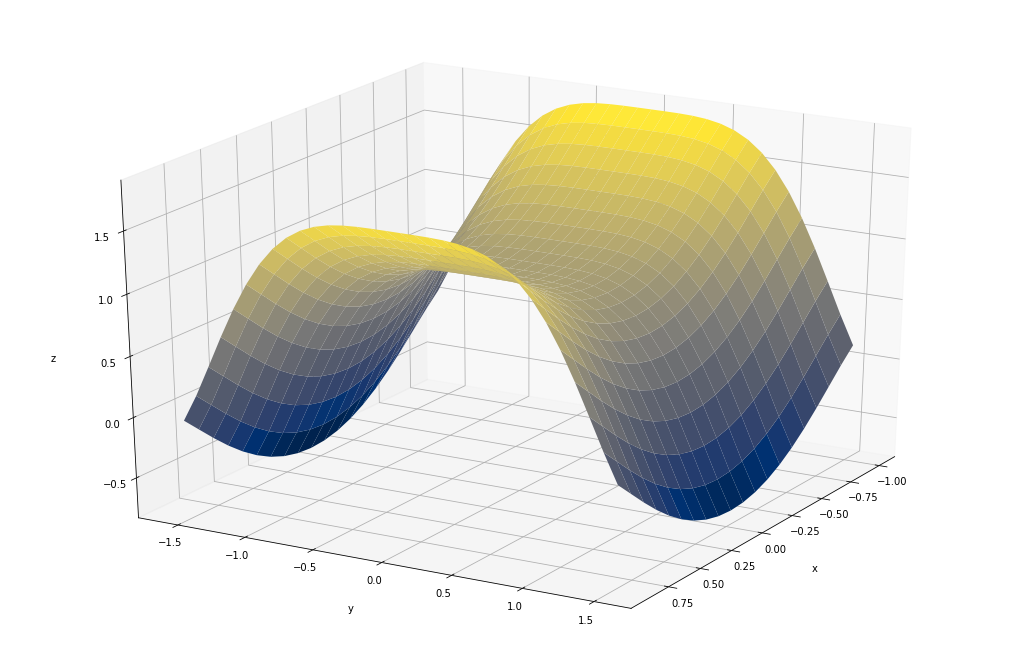

In [68]:
# building up MN samples of s(m,n)


x = np.arange(-1, 1, 0.1)
y = np.arange(-np.pi/2, np.pi/2, 0.1)
M = len(x)
N = len(y)
K = int(np.floor(M/2))  #assuming that pencil parameter's better to be half of samples(like what we had in GPOF)
L = int(np.floor(N/2))

X, Y = np.meshgrid(x, y)           # why x and y are inverse is the matter of indexing

s = (np.sin(X **2) + np.cos(Y **2) )

"""plot"""
#                          (length, width)
fig = plt.figure(figsize = (18,12))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, Y, s, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)


#           (hight, long)
ax.view_init(25, 30)
plt.show()

In [69]:
# building up Fms and Fe matrices
Fms = []
for i in range(M):
  #                (first column, last row)
  Fms.append(hankel(s[0:L, i],s[L-1:N, i]))

In [70]:
# this might crash if matrix is big!
Fe_rows = []
for i in range(K):
  Fe_rows.append(np.hstack(Fms[i:M-K+i+1]))

In [71]:
Fe = np.vstack(Fe_rows) # it's true inshallah=) (reviewed in 2022/07/08: 2:24pm)

In [77]:
# it may take some time! depending of matrix size
U1,Svalues1,Vh1 = svd(Fe, full_matrices=False)
# mabe it could be improved through improving the save of Hankel matrix

In [78]:
G1 = pinv(U1[:-L,:])@U1[L:,:]

In [79]:
Xps = eigvals(G1)

In [80]:
n=U1.shape[0]
I = np.identity(n)
p = np.arange(0,K*L,L)
for i in range(1,L):
  p = np.concatenate([p, np.arange(i,i+K*L,L)])
P = np.take(I,p,axis=0)  #P is true inshaallah

In [86]:
Uprime2 = P@U1

In [87]:
Gprime2 = pinv(Uprime2[:-L,:])@Uprime2[L:,:]    #assuming Lrows deleted(if not, try out K)

In [88]:
Yps = eigvals(Gprime2)

In [89]:
# it could take some time!   it could be parallelized through GPU 
#45 mins!!
VYp = np.vander(Yps, N=N, increasing=True).T
Matrix = VYp

for i in range(1, M):              # there's a prblem here that mentioned in the paper
  Matrix = np.vstack((Matrix, VYp@matrix_power(np.diag(Xps), i)))
Matrix.shape   

(640, 160)

In [90]:
#to attain Cs
C, Residuals, rank, Singulars = lstsq(Matrix, np.ndarray.flatten(s, order='F'), rcond=None) # rcond could make problem!

In [95]:
#predicting the final values:

# s_pred = (Matrix@C).real
# s_p = np.reshape(s_pred, (N,M), order='F')



#well the s_prev above was wrong(not toatally wrong though!)! we must follow equation (13)
Xps.shape
rank

39

In [60]:
sum(C)

(0.060436248779296875+0.00013065338134765625j)

In [97]:
M

20

In [99]:
# predicting final values through (13)
s_p = np.zeros((N,M))               # the orde of (M,N) or (N,M)
# to form (13) I could either make a tensor or do it with 2 for 
# let's go with the easier for now:
for i in range(N):
  for j in range(M):
    s_p[i][j] = sum(C*(Xps**i+Yps**j))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [102]:
s.shape

(32, 20)

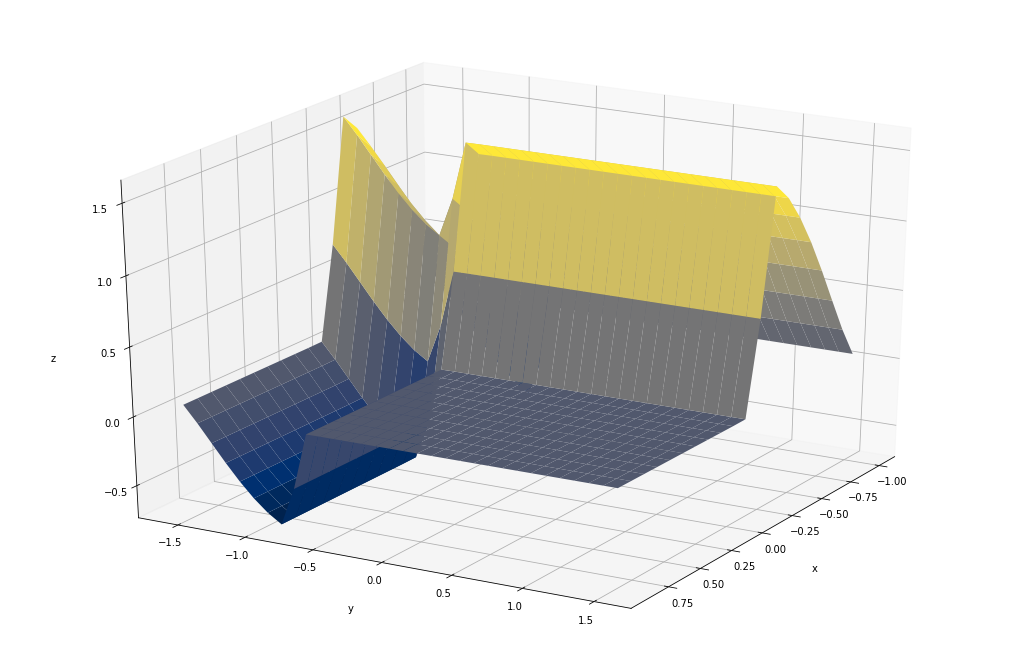

In [103]:
"""plot the results"""
#                          (length, width)
fig = plt.figure(figsize = (18,12))
ax = plt.axes(projection='3d')


surf1 = ax.plot_surface(X, Y, s_p, cmap = plt.cm.cividis)
#surf2 = ax.plot_surface(X, Y, s)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)


#           (hight, long)
ax.view_init(25, 30)
plt.show()